In [13]:
%matplotlib inline
%xmode plain
%store -r __std_imports

Exception reporting mode: Plain


In [2]:
__std_imports

importing os, re, pathlib, numpy, pandas and tqdm.


In [3]:
import pandas_profiling as pp
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context="notebook")

In [4]:
df = pd.read_csv("../data/politics18/politics18.csv")

### Descriptive stats of our dataset.

In [5]:
pp.describe(df)["table"]

{'n': 15346,
 'nvar': 7,
 'total_missing': 0.004486976596972688,
 'n_duplicates': 0,
 'memsize': '839.3 KiB',
 'recordsize': '56.0 B',
 'NUM': 0,
 'DATE': 0,
 'CONST': 0,
 'CAT': 4,
 'UNIQUE': 3,
 'CORR': 0,
 'RECODED': 0,
 'BOOL': 0,
 'UNSUPPORTED': 0,
 'REJECTED': 0}

In [6]:
pp.describe(df)["variables"]

,count,distinct_count,p_missing,n_missing,p_infinite,n_infinite,is_unique,mode,p_unique,memorysize,type,top,freq
author,15346,1612,0,0,0,0,False,PTI,0.105044,122848,CAT,PTI,2422
content,15346,15346,0,0,0,0,True,"Tulsi Gabbard, the first Hindu lawmaker from H...",1,122848,UNIQUE,NaN,NaN
date,15346,334,0,0,0,0,False,2018-05-15,0.0217646,122848,CAT,2018-05-15,117
tag,14864,13140,0.0314088,482,0,0,False,Law,0.856249,122848,CAT,Law,251
title,15346,15346,0,0,0,0,True,Tulsi Gabbard: Hindu War Veteran US Lawmaker M...,1,122848,UNIQUE,NaN,NaN
url,15346,15346,0,0,0,0,True,https://www.thequint.com/news/world/tulsi-gabb...,1,122848,UNIQUE,NaN,NaN
website,15346,7,0,0,0,0,False,firstpost,0.000456145,122848,CAT,firstpost,5621


In [7]:
author_frequency = pp.describe(df)["freq"]["author"]
date_frequency = pp.describe(df)["freq"]["date"]
website_frequency = pp.describe(df)["freq"]["website"]

In [8]:
def count_plot(data, figsize=(20,5), alpha=0.9, palette="ch:5.1,.95,dark=.10", xlabel="none", fontsize=14, labelsize=15, rotation=0):
    plt.figure(figsize=figsize)
    sns.barplot(data.index, data.values, alpha=alpha, palette=palette).tick_params(labelsize=labelsize)
    plt.xticks(rotation=rotation)
    plt.ylabel("FREQUENCY", fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.show()

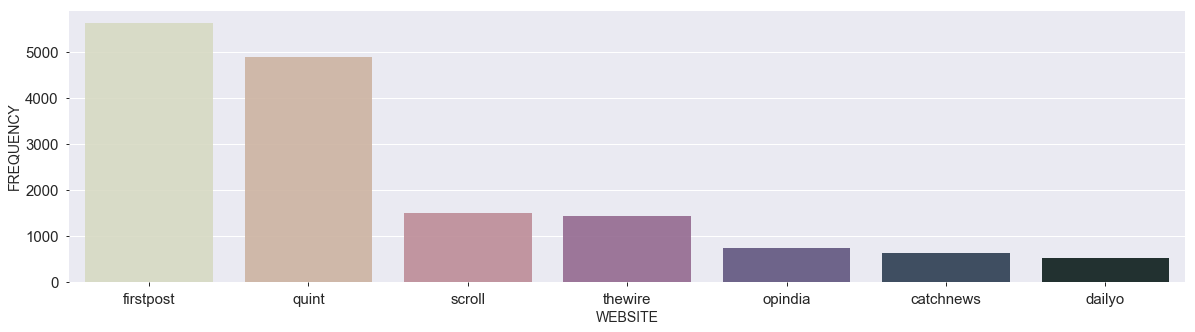

In [14]:
count_plot(website_frequency, xlabel="WEBSITE")

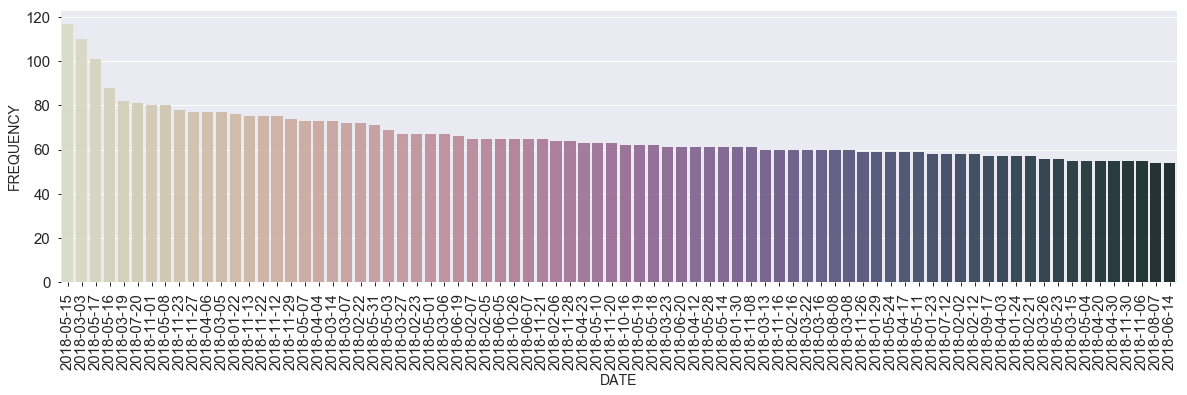

In [15]:
count_plot(date_frequency.head(80), xlabel="DATE", labelsize=15, rotation=90)

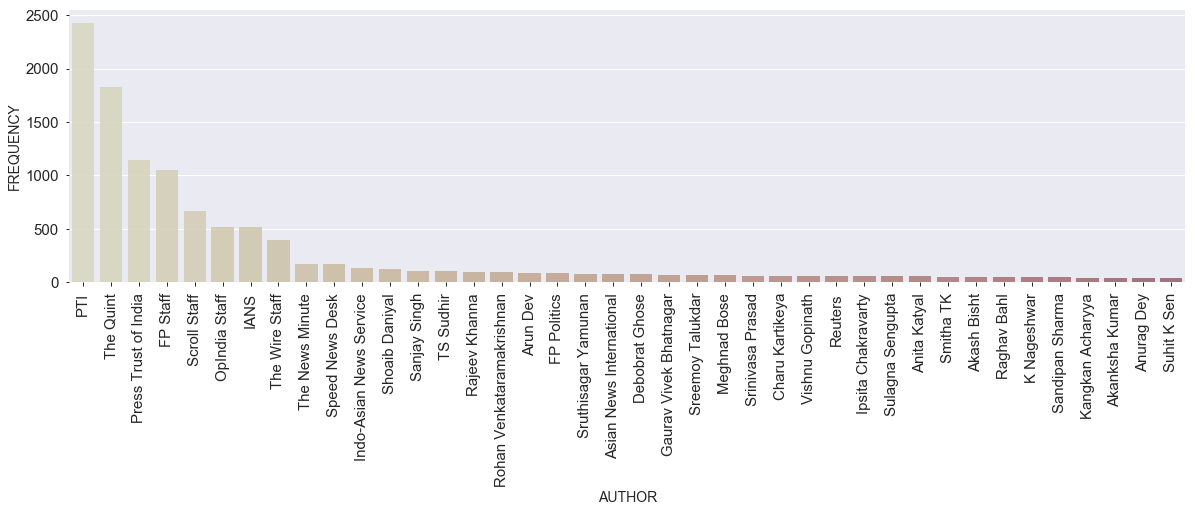

In [16]:
#top 40 authors
count_plot(author_frequency.head(40), xlabel="AUTHOR", labelsize=15, rotation=90, palette="ch:9.1,.53,dark=.45")

In [17]:
df.head(10)

,author,content,date,tag,title,url,website
0,The Quint,"Tulsi Gabbard, the first Hindu lawmaker from H...",2018-11-13,Tulsi Gabbard,Tulsi Gabbard: Hindu War Veteran US Lawmaker M...,https://www.thequint.com/news/world/tulsi-gabb...,quint
1,Pushpesh Pant,Swami Vivekananda ranks among the highest in t...,2018-07-03,"Swami Vivekananda,Hinduism,Tolerance,Politics ...",Swami Vivekananda’s 156th Birth Anniversary 20...,https://www.thequint.com/voices/opinion/swami-...,quint
2,Meeran Chadha Borwankar,"In the news for the wrong reasons, the Central...",2018-07-18,"Modi Government,Central Bureau of Investigatio...",Rift Between CBI Chief & Special Director: Thi...,https://www.thequint.com/voices/opinion/cbi-co...,quint
3,Mayukh Ghosh,Reminiscing about the past is a dreadful tool ...,2018-05-14,"Satyajit Ray,Shyam Benegal,Smita Patil,Politic...",The Late Filmmaker Mrinal Sen’s ‘Cinema of Res...,https://www.thequint.com/entertainment/indian-...,quint
4,Akanksha Kumar,: Akanksha Kumar : Sandeep Suman Twenty-three ...,2018-04-30,"Tihar Jail,Supreme Court of India,Life Impriso...",Tandoor Murder: Former Delhi Police Joint Comm...,https://www.thequint.com/videos/news-videos/ho...,quint
5,Poonam Agarwal,As many as 92 witnesses in the Sohrabuddin fak...,2018-01-29,"Sohrabuddin Sheikh Encounter,Kausarbi,fake enc...",Sohrabuddin Encounter: Details of 30 Witnesses...,https://www.thequint.com/news/india/sohrabuddi...,quint
6,The Quint,"Purnendu Pritam With heavy rains, thunderstorm...",2018-06-14,"Assam,United States,AIADMK,QWrap,FIFA,Anand L ...","Today’s News in Videos: Rains, Thunderstorms, ...",https://www.thequint.com/videos/news-videos/la...,quint
7,Indira Basu,Ahead of the Rajasthan assembly elections on 7...,2018-08-31,"Sachin Pilot,Rajasthan Chief Minister Vasundha...",Rajasthan Election Results: Sachin Pilot On Co...,https://www.thequint.com/news/politics/sachin-...,quint
8,Kingshuk Nag,"In February 2015, barely months after ascendin...",2018-03-27,"Hyderabad,Telangana government,Third Front Gov...",KCR – The Father of ‘Modern Hyderabad’ - The Q...,https://www.thequint.com/voices/opinion/opinio...,quint
9,Kota Neelima,"Rural Telangana, where almost 62 percent of th...",2018-11-29,"Farmer Suicides,Social Welfare Schemes,Telanga...",Farmers March in Delhi: Why Are Telangana’s Fa...,https://www.thequint.com/voices/opinion/farmer...,quint
